In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
    
import numpy as np
import pandas as pd
import pickle
from pathlib import Path

from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
plt.style.use('_classic_test')

DATA_ROOT = Path('F:/Sandbox/embl_project/data/Timelapse_2019')
log_const = 300

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
with open(DATA_ROOT / 'descriptors_all.r34.sz48.pkl', 'rb') as f:
    y_all, descriptors_all, intensities_all, df_index_all = pickle.load(f)
descriptors_all = np.log(descriptors_all + 1e-7)
intensities_all = np.log(intensities_all + log_const)
print(y_all.shape, descriptors_all.shape, intensities_all.shape)

(2684453, 4) (2684453, 4) (2684453, 2)


In [33]:
cls = np.argmax(y_all, axis=1)
class_names = np.unique(cls)
num_classes = len(class_names)
class_lengths = {c: sum(cls == c) for c in class_names}
print('Class lengths -', ', '.join(map(lambda item: f'{item[0]}: {item[1]}', class_lengths.items())))

Class lengths - 0: 660827, 1: 679534, 2: 676216, 3: 667876


<Figure size 640x640 with 0 Axes>

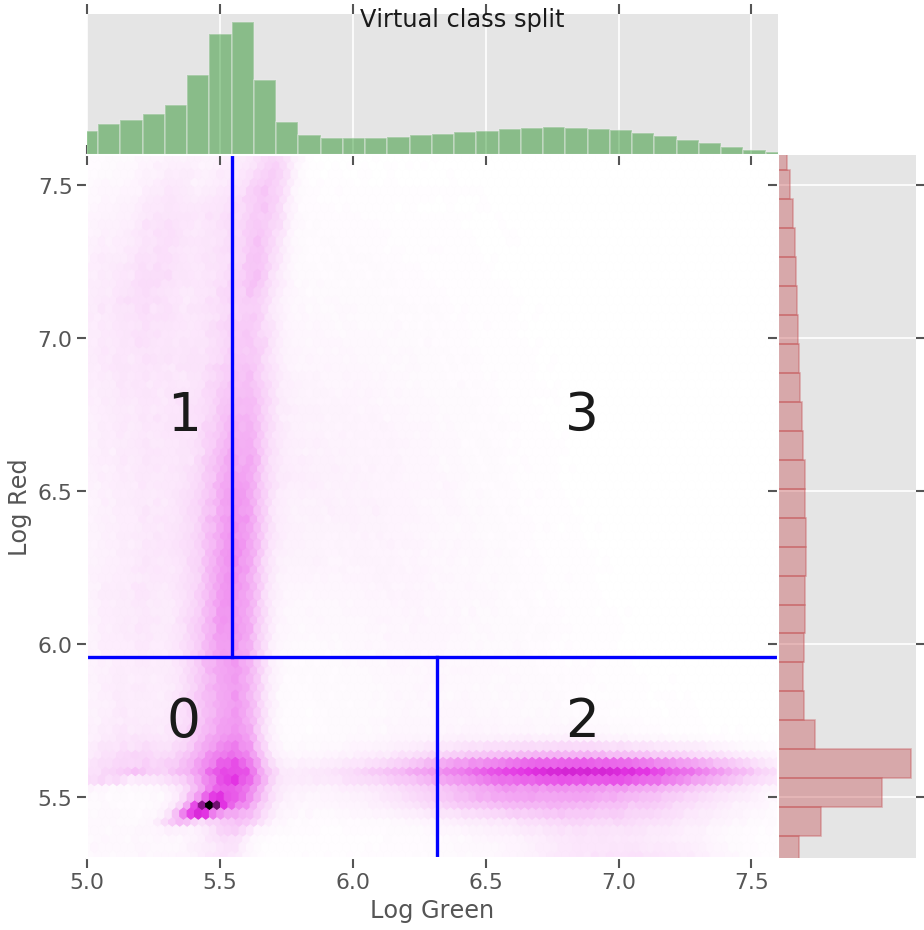

In [38]:
sns.set_context('talk', font_scale=1.2, rc={"lines.linewidth": 3.0})

xlim=(5.0, 7.6)
ylim=(5.3, 7.6)

fig = plt.figure(figsize=(8, 8))
g = sns.jointplot(x="Log Green", y="Log Red", 
                  data=pd.DataFrame(data={"Log Green": intensities_all[:, 0], "Log Red": intensities_all[:, 1]}),
                 xlim=xlim, ylim=ylim,
                 color="violet",
                 space=0,
                 kind="hex",
                 height=12,
                 ratio=5,
                 joint_kws={"gridsize": 150},
                 marginal_kws={'color': 'green'})
_ = plt.setp(g.ax_marg_y.patches, color="r")
df2 = pd.DataFrame(data={"x": xlim, "y": [5.9584246, 5.9584246]})
g.x = df2.x
g.y = df2.y
g.plot_joint(plt.plot, linestyle="-", linewidth=3, alpha=1.0, c="blue")
df2 = pd.DataFrame(data={"x": [6.315358, 6.315358], "y": [5, 5.9584246]})
g.x = df2.x
g.y = df2.y
g.plot_joint(plt.plot, linestyle="-", linewidth=3, alpha=1.0, c="blue")
df2 = pd.DataFrame(data={"x": [5.5451775, 5.5451775], "y": [5.9584246, 8.0]})
g.x = df2.x
g.y = df2.y
g.plot_joint(plt.plot, linestyle="-", linewidth=3, alpha=1.0, c="blue")
plt.gca().annotate('0', [5.3, 5.7], fontsize=48, color="k")
plt.gca().annotate('1', [5.3, 6.7], fontsize=48, color="k")
plt.gca().annotate('2', [6.8, 5.7], fontsize=48, color="k")
plt.gca().annotate('3', [6.8, 6.7], fontsize=48, color="k")
g.fig.suptitle('Virtual class split')

# plt.savefig('vcs_v1.pdf', bbox_inches='tight')  # very large pdf
plt.savefig('vcs_v1.png', bbox_inches='tight')

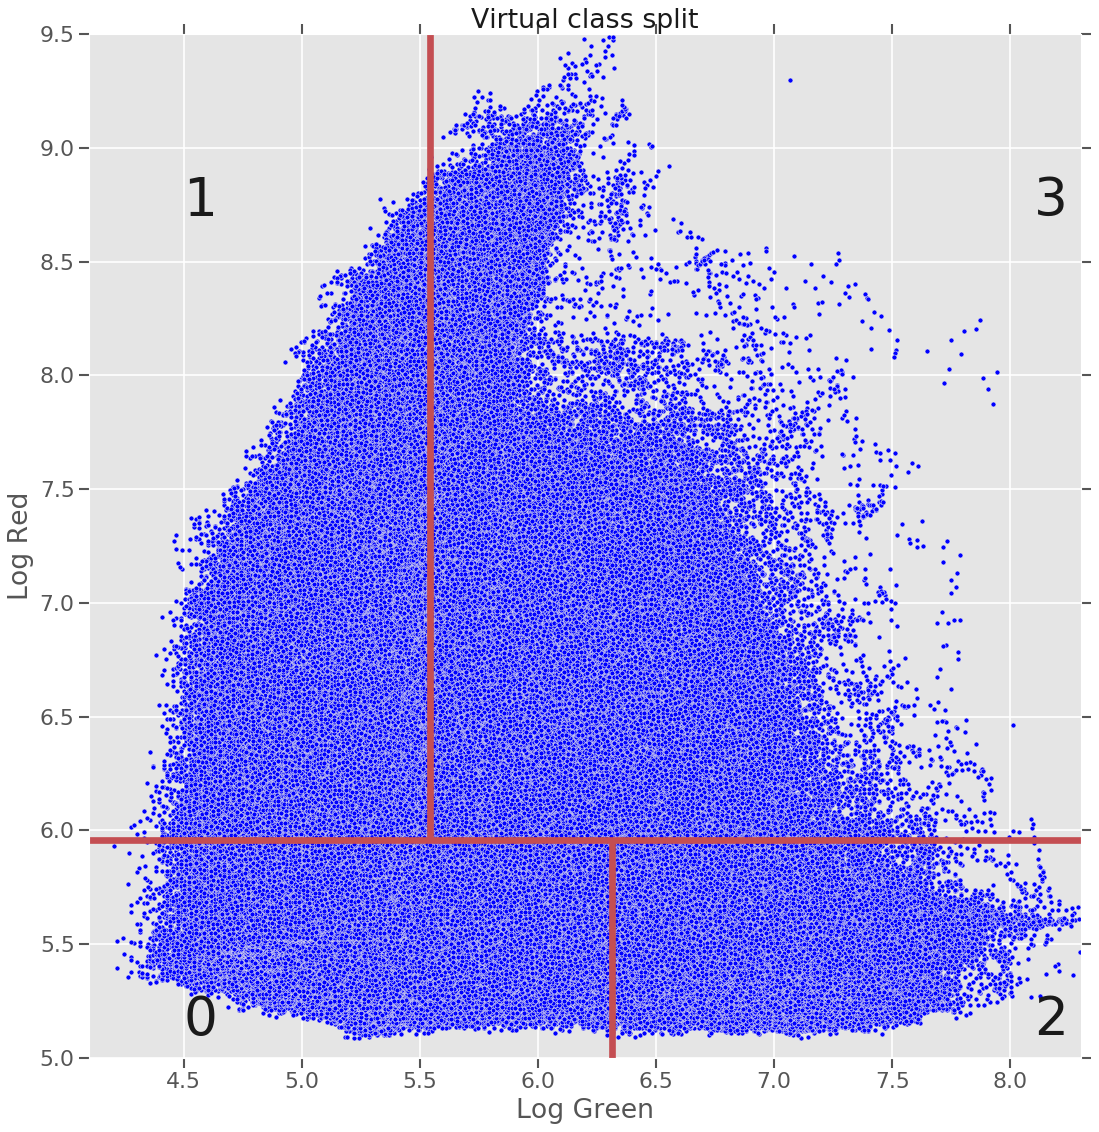

In [41]:
plt.style.use('ggplot')

xlim = (4.1, 8.3)
ylim = (5.0, 9.5)

fig = plt.figure(figsize=(16, 16))
color = 'blue'
fontsize = 24
largefontsize = 48
linewidth = 6
ax = fig.add_subplot(111)
ax.scatter(intensities_all[::1, 0], intensities_all[::1, 1], c=color)
ax.hlines(y=5.9584246, xmin=xlim[0], xmax=xlim[1], color='r', linestyle='-', linewidth=linewidth)
ax.vlines(x=5.5451775, ymin=5.9584246, ymax=ylim[1], color='r', linestyle='-', linewidth=linewidth)
ax.vlines(x=6.315358, ymin=ylim[0], ymax=5.9584246, color='r', linestyle='-', linewidth=linewidth)
ax.set_title('Virtual class split', fontsize=fontsize)
ax.set_xlabel('Log Green', fontsize=fontsize)
ax.set_ylabel('Log Red', fontsize=fontsize)
ax.text(x=4.5, y=5.1, s='0', fontsize=largefontsize)
ax.text(x=4.5, y=8.7, s='1', fontsize=largefontsize)
ax.text(x=8.1, y=5.1, s='2', fontsize=largefontsize)
ax.text(x=8.1, y=8.7, s='3', fontsize=largefontsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# plt.savefig('vcs_v2.pdf', bbox_inches='tight')  # very large pdf
plt.savefig('vcs_v2.png', bbox_inches='tight')
plt.show()